In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
data=pd.read_csv('/content/Admission_Predict.csv')
data

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...,...
395,396,324,110,3,3.5,3.5,9.04,1,0.82
396,397,325,107,3,3.0,3.5,9.11,1,0.84
397,398,330,116,4,5.0,4.5,9.45,1,0.91
398,399,312,103,3,3.5,4.0,8.78,0,0.67


In [ ]:
data=data.drop(columns='Serial No.')
data

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...
395,324,110,3,3.5,3.5,9.04,1,0.82
396,325,107,3,3.0,3.5,9.11,1,0.84
397,330,116,4,5.0,4.5,9.45,1,0.91
398,312,103,3,3.5,4.0,8.78,0,0.67


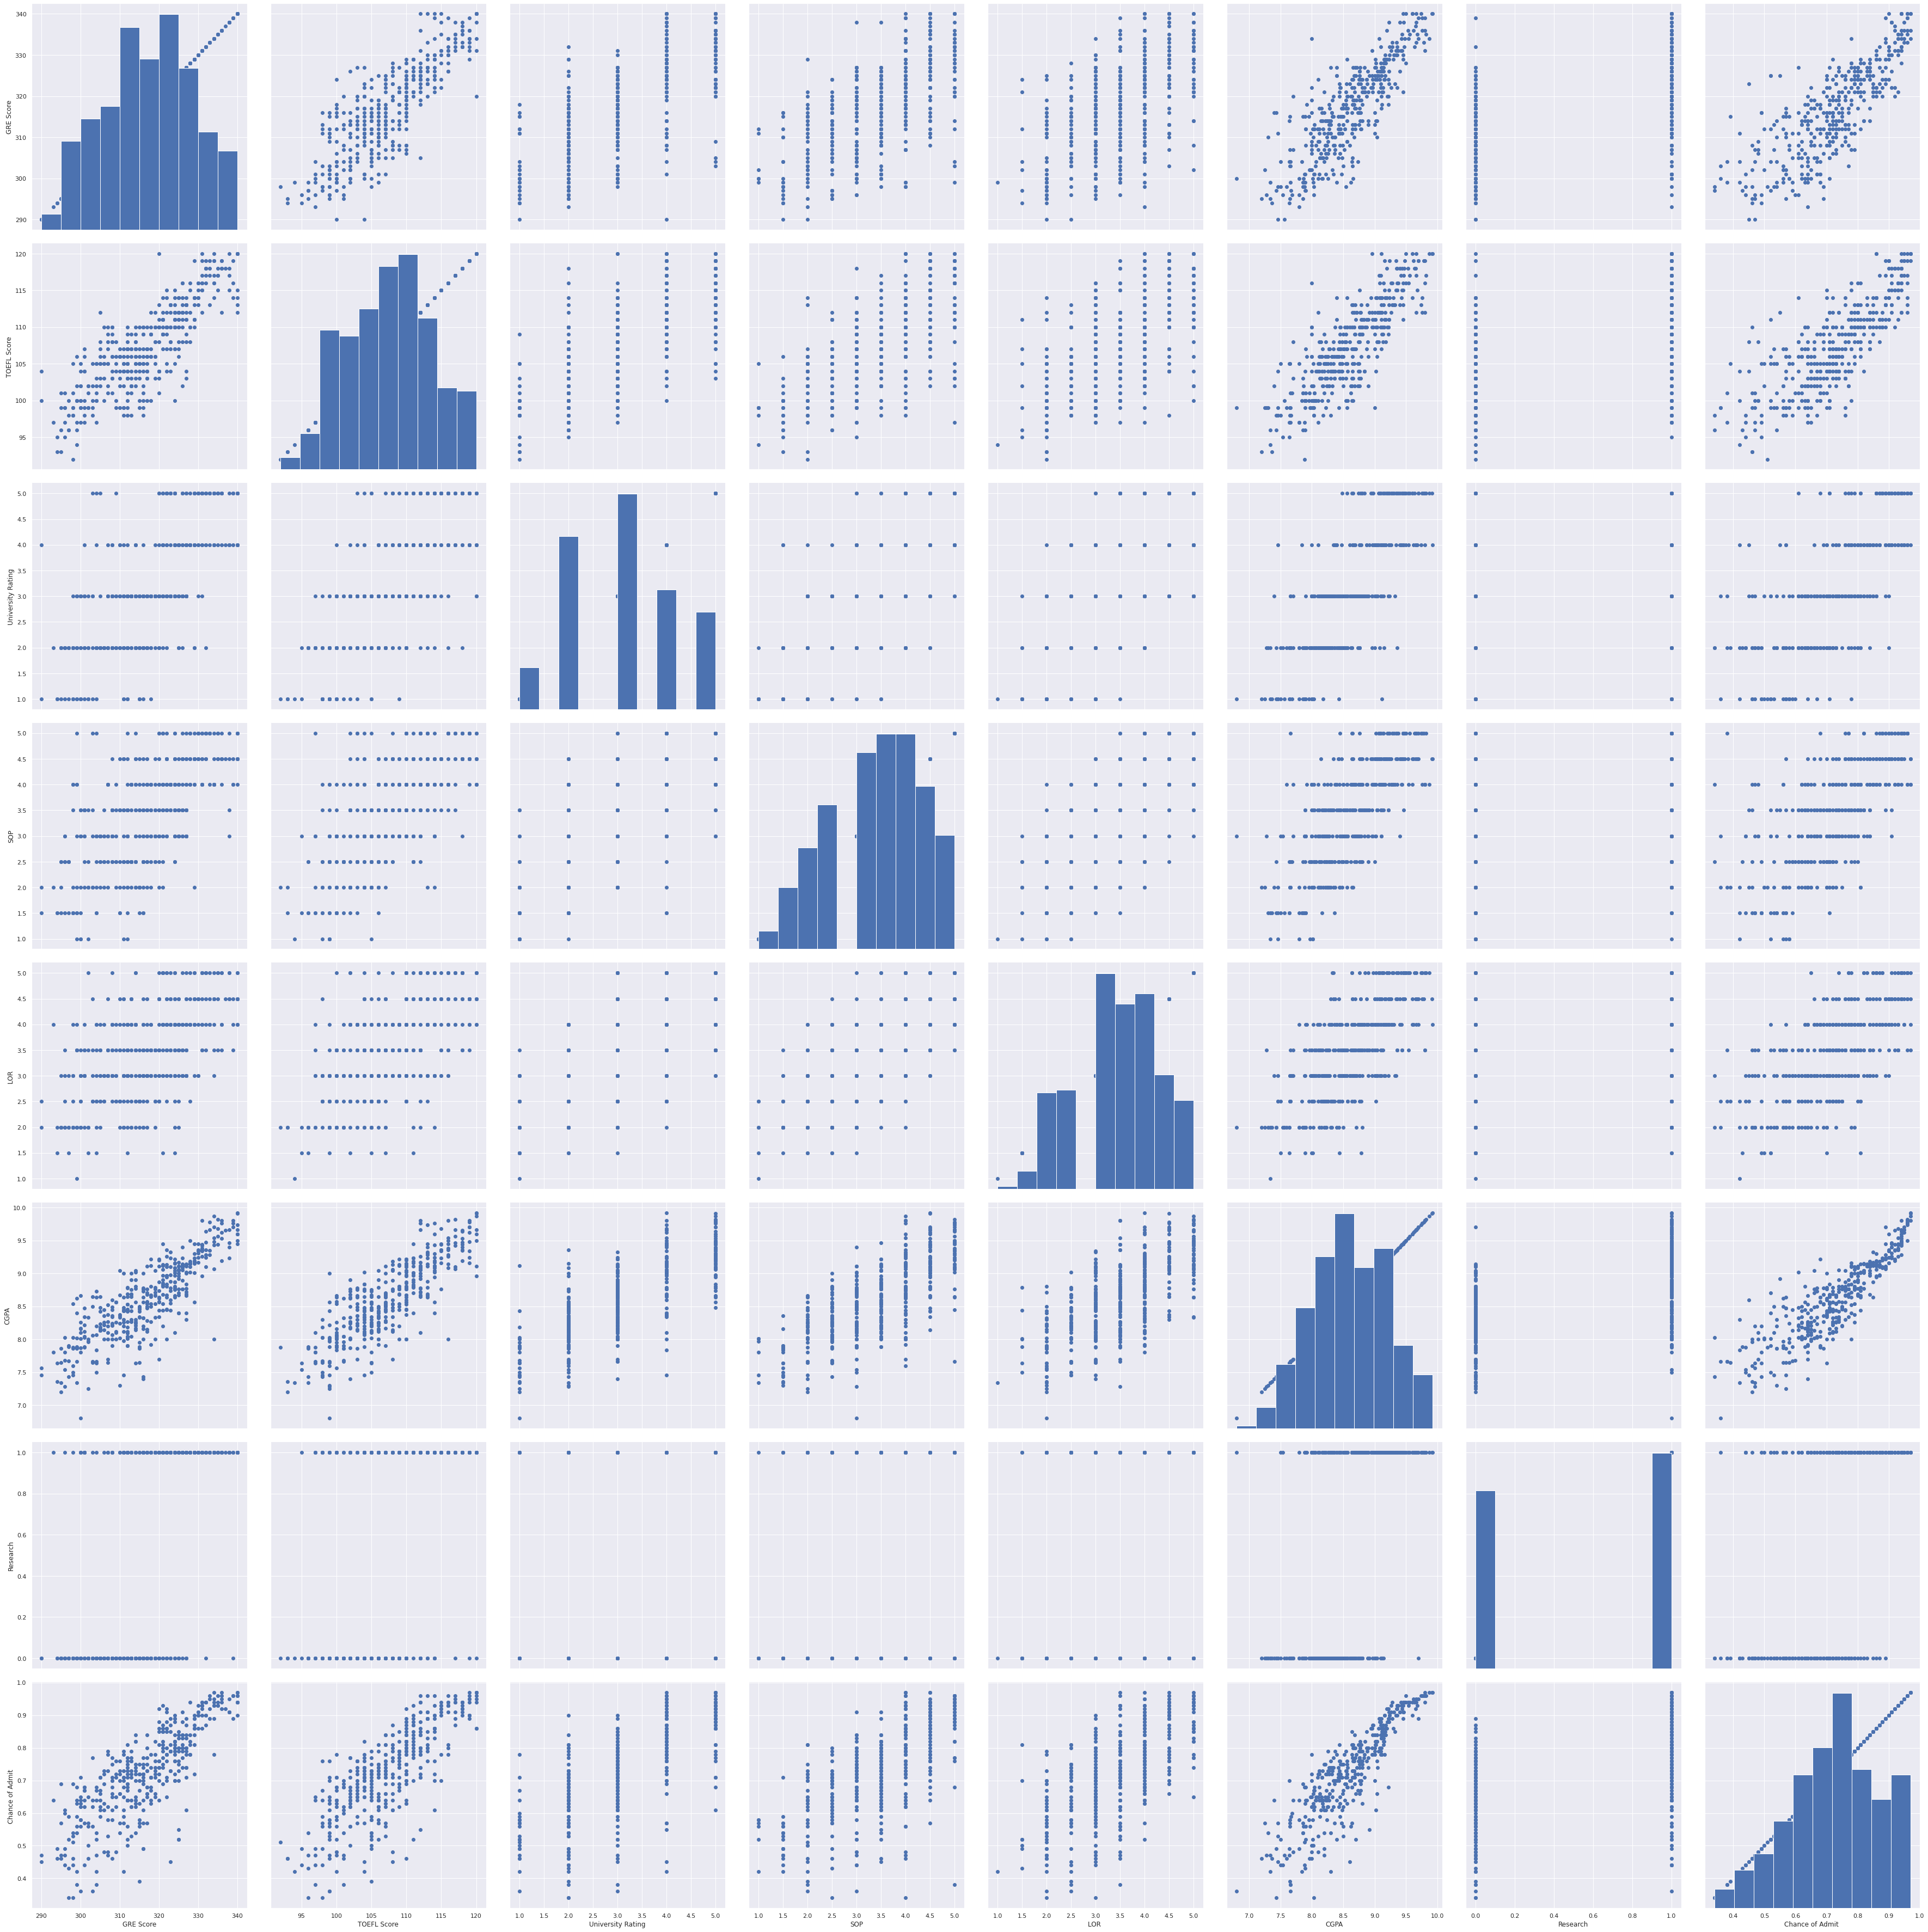

In [ ]:
g = sns.pairplot(data)
g = g.map(plt.scatter)
g.fig.set_size_inches(50,50)

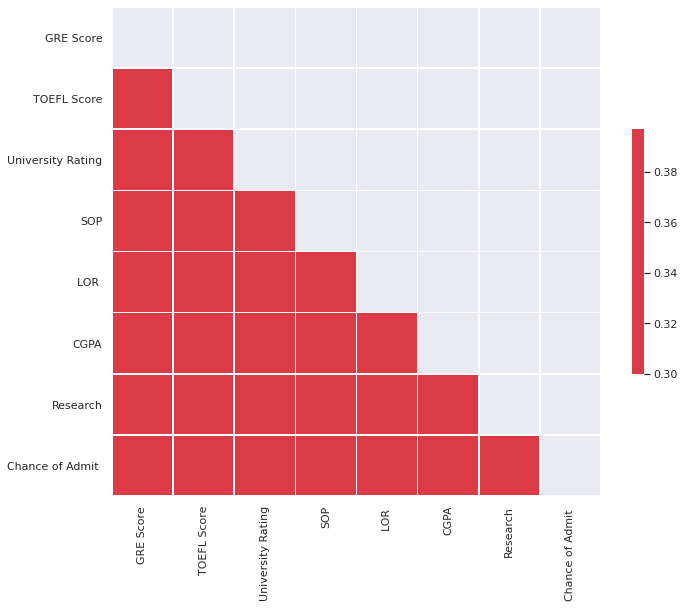

In [ ]:
corr = data.corr()
mask = np.triu(np.ones_like(corr, dtype=np.bool))
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [ ]:
data=data.iloc[:,:].values
data

array([[337.  , 118.  ,   4.  , ...,   9.65,   1.  ,   0.92],
       [324.  , 107.  ,   4.  , ...,   8.87,   1.  ,   0.76],
       [316.  , 104.  ,   3.  , ...,   8.  ,   1.  ,   0.72],
       ...,
       [330.  , 116.  ,   4.  , ...,   9.45,   1.  ,   0.91],
       [312.  , 103.  ,   3.  , ...,   8.78,   0.  ,   0.67],
       [333.  , 117.  ,   4.  , ...,   9.66,   1.  ,   0.95]])

In [ ]:
x=data[:,:-1]
y=data[:,-1]

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,shuffle=True)

In [ ]:
Lr=LinearRegression()
Lr.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
y_pred=Lr.predict(x_test)

In [ ]:
DF=pd.DataFrame({'actual':y_test.flatten(),'predcited':y_pred.flatten()})
DF

,actual,predcited
0,0.86,0.849694
1,0.57,0.521476
2,0.75,0.665291
3,0.62,0.677137
4,0.71,0.669365
...,...,...
75,0.42,0.557208
76,0.76,0.800028
77,0.71,0.604291
78,0.36,0.435491


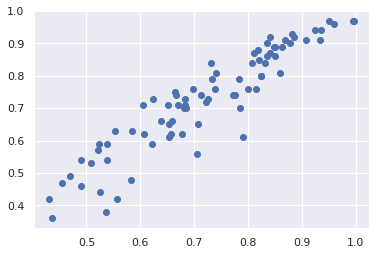

In [ ]:
plt.scatter(y_pred,y_test)
plt.show()

In [ ]:
metrics.r2_score(y_test,y_pred)

0.8608911521187682